In [6]:
from utils import *
from moves import *

from random_cycles import gen_random_cycles
from local_search import local_search_steepest
from cache import cache_moves_algorithm
from candidate import candidate_moves_algorithm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 30/30 [04:04<00:00,  8.14s/it]


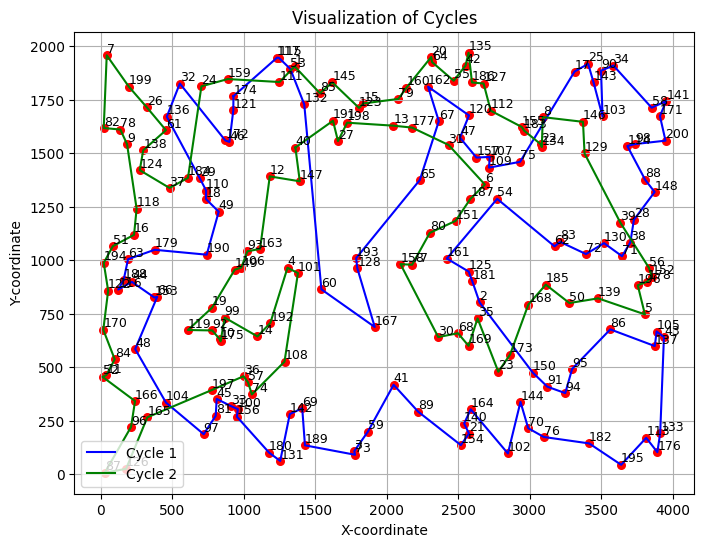

Best length for data/kroA200.tsp using local_search_steepest is: 36787.86322658643


100%|██████████| 30/30 [04:09<00:00,  8.32s/it]


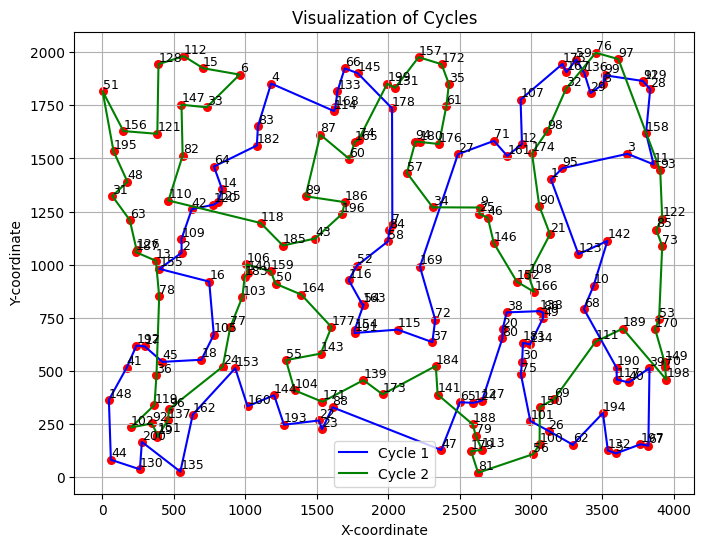

Best length for data/kroB200.tsp using local_search_steepest is: 36348.51783378403


100%|██████████| 30/30 [03:49<00:00,  7.64s/it]


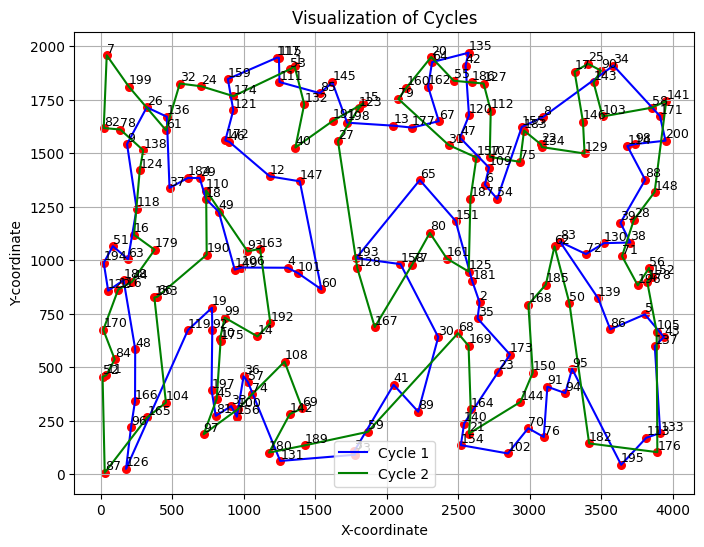

Best length for data/kroA200.tsp using candidate_moves_algorithm is: 44566.57509804162


100%|██████████| 30/30 [03:46<00:00,  7.56s/it]


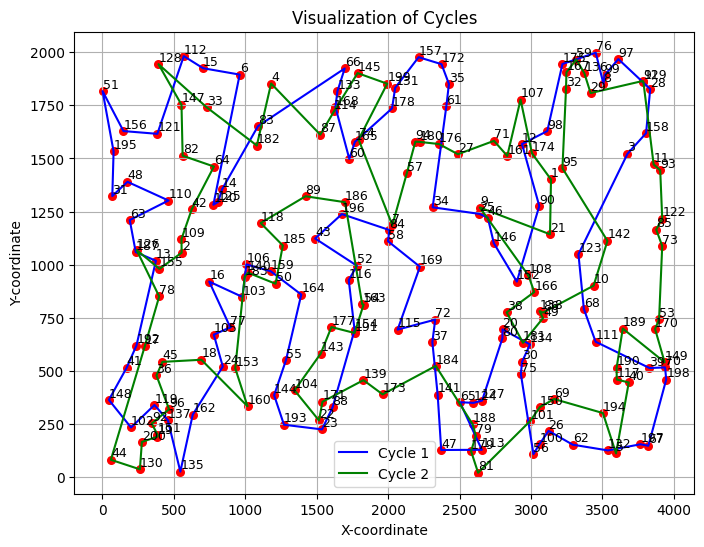

Best length for data/kroB200.tsp using candidate_moves_algorithm is: 43693.32931289616


100%|██████████| 30/30 [00:38<00:00,  1.30s/it]


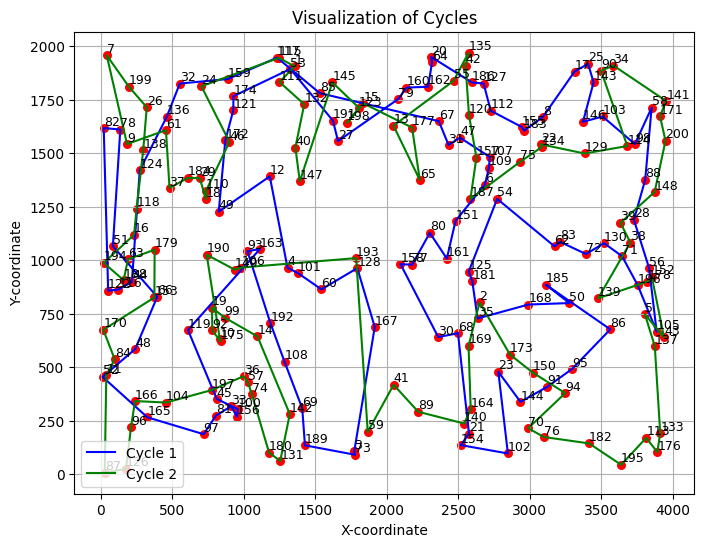

Best length for data/kroA200.tsp using cache_moves_algorithm is: 47708.99769651692


100%|██████████| 30/30 [00:39<00:00,  1.31s/it]


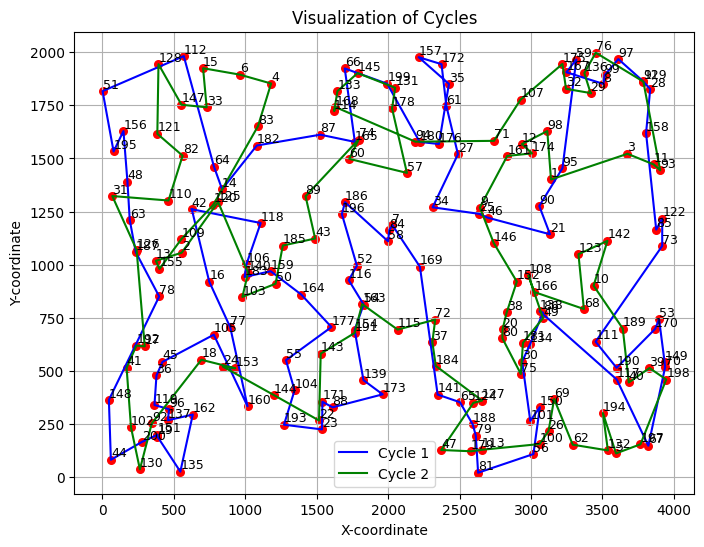

Best length for data/kroB200.tsp using cache_moves_algorithm is: 47115.057080122344


In [7]:
instances = ['data/kroA200.tsp', 'data/kroB200.tsp']
functions = [local_search_steepest, candidate_moves_algorithm, cache_moves_algorithm]

for f in functions:
    for instance in instances:
        best_length = 0
        best_cycles = None
        for i in tqdm(range(30)):

            FILENAME = instance

            data = read_data_file(FILENAME)
            distance = calculate_distance_matrix(data)
            random_cycle1, random_cycle2 = gen_random_cycles(get_nodes(data))
            
            start = time.time()
            c1, c2 = f(random_cycle1, random_cycle2, distance, data)
            c1, c2 = random_cycle1, random_cycle2
            end = time.time()
            
            final_length = calculate_cycles_length(c1, c2, distance)
            if final_length < best_length or best_length == 0:
                best_length = final_length
                best_cycles = (c1, c2)


            with open('results.csv', 'a') as file:
                file.write(f"{instance};{i};{f.__name__};{final_length};{end-start}\n")
        
        plot_cycles(best_cycles[0], best_cycles[1], data)
        print(f"Best length for {instance} using {f.__name__} is: {best_length}")

In [8]:
results = pd.read_csv('results.csv', sep=';', header=None)
results.columns = ['Instancja', 'Iteration', 'Algorytm', 'Długość cyklu', 'Czas wykonania']
results['Długość cyklu'] = results['Długość cyklu'].astype(float)
results['Czas wykonania'] = results['Czas wykonania'].astype(float)
results.drop('Iteration', axis=1, inplace=True)

results_without_time = results.drop('Czas wykonania', axis=1)
results_without_length = results.drop('Długość cyklu', axis=1)

In [9]:
stats = results_without_time.groupby(['Instancja', 'Algorytm']).agg(['min', 'mean', 'max'])


stats = stats.round({('Length', 'min'): 2, ('Length', 'mean'): 2, ('Length', 'max'): 2, 
                     ('Time', 'min'): 4, ('Time', 'mean'): 4, ('Time', 'max'): 4})
stats

Długość cyklu                \
                                                     min          mean   
Instancja        Algorytm                                                
data/kroA200.tsp cache_moves_algorithm      47267.915192  51859.031409   
                 candidate_moves_algorithm  44566.575098  46961.393053   
                 local_search_steepest      36005.839239  38547.026885   
data/kroB200.tsp cache_moves_algorithm      46743.546717  51190.983409   
                 candidate_moves_algorithm  43693.329313  46224.361145   
                 local_search_steepest      35537.938877  38594.776441   

                                                          
                                                     max  
Instancja        Algorytm                                 
data/kroA200.tsp cache_moves_algorithm      60111.275291  
                 candidate_moves_algorithm  49750.158656  
                 local_search_steepest      40698.701641  
data/kroB200.tsp cache_moves_algorithm      58214.533661  
                 candidate_moves_algorithm  51202.960002  
                 local_search_steepest      41552.117977

In [10]:
stats = results_without_length.groupby(['Instancja', 'Algorytm']).agg(['min', 'mean', 'max'])


stats = stats.round({('Length', 'min'): 2, ('Length', 'mean'): 2, ('Length', 'max'): 2, 
                     ('Time', 'min'): 4, ('Time', 'mean'): 4, ('Time', 'max'): 4})

stats

Czas wykonania                     
                                                      min      mean        max
Instancja        Algorytm                                                     
data/kroA200.tsp cache_moves_algorithm           0.834997  1.353020   2.010999
                 candidate_moves_algorithm       3.725002  5.293434   8.221999
                 local_search_steepest           7.460997  8.231155   9.662000
data/kroB200.tsp cache_moves_algorithm           0.938001  1.331256   1.924998
                 candidate_moves_algorithm       3.630999  5.246614   8.134998
                 local_search_steepest           7.357001  8.627071  10.306000